Importando as bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts

Importando os dados e visualizando

In [4]:
#importar dados
dataset = pd.read_csv("dados.csv", sep=";")
#visulizar
dataset.head()


,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [5]:
dataset.shape


(187, 4)

Exploração dos dados

In [9]:
dataset.groupby(['MUNICIPIO']).size()

MUNICIPIO
AGUDO                         1
AJURICABA                     1
ALECRIM                       1
ALMIRANTE TAMANDARE DO SUL    1
ALTO FELIZ                    1
                             ..
VERA CRUZ                     1
VIADUTOS                      1
VICTOR GRAEFF                 1
VILA MARIA                    1
VILA NOVA DO SUL              1
Length: 177, dtype: int64

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64


Text(0.5, 1.0, 'PIB')

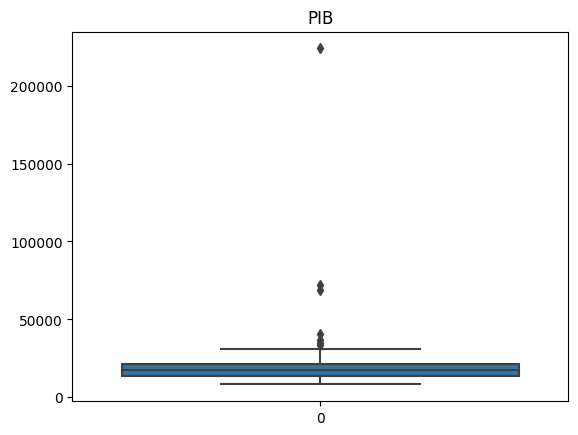

In [11]:
i = 'PIB'
print(dataset[i].describe())
srn.boxplot(dataset[i]).set_title(i)

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64


Text(0.5, 1.0, 'VALOREMPENHO')

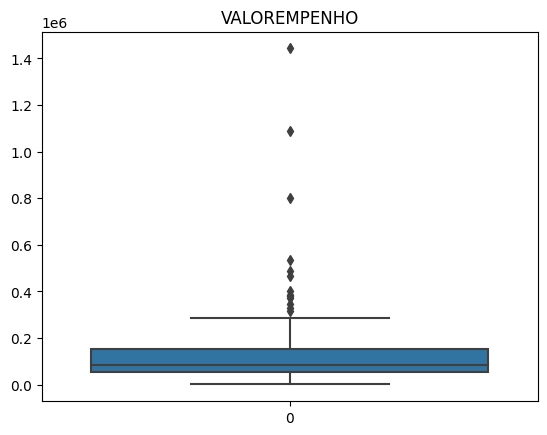

In [12]:
i = 'VALOREMPENHO'
print(dataset[i].describe())
srn.boxplot(dataset[i]).set_title(i)

Verificar se tem valores NAN e se tem valores duplicados

In [13]:
dataset.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

In [22]:
dataset[dataset.duplicated(['CODIGO'], keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [23]:
dataset.drop_duplicates(subset = 'CODIGO', keep = 'first', inplace=True)

In [24]:
dataset[dataset.duplicated(['CODIGO'], keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


PIB e VALOREMPENHO apresentaram outlier

In [26]:
desv = sts.stdev(dataset['PIB'])
dataset.loc[dataset['PIB'] >= 2*desv]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82
91,356,GARRUCHOS,68672.25,271841.26
146,453,MUITOS CAPOES,72353.72,140597.55
155,476,CAPAO DO CIPO,36739.78,60851.00
176,108,SANTA CRUZ DO SUL,40671.53,9637.00


In [29]:
mediana = sts.median(dataset['PIB'])
dataset.loc[dataset['PIB'] >= 2*desv, 'PIB'] = mediana
dataset.loc[dataset['PIB'] >= 2*desv]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


In [30]:
desv = sts.stdev(dataset['VALOREMPENHO'])
dataset.loc[dataset['VALOREMPENHO'] >= 2*desv]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
5,98,QUARAI,12552.51,381286.24
8,126,SAO LUIZ GONZAGA,15887.14,385185.68
9,153,URUGUAIANA,21084.19,401124.62
10,36,DOM PEDRITO,19013.71,371857.25
14,239,JOIA,23312.14,347560.44


In [31]:
mediana = sts.median(dataset['VALOREMPENHO'])
dataset.loc[dataset['VALOREMPENHO'] >= 2*desv, 'VALOREMPENHO'] = mediana
dataset.loc[dataset['VALOREMPENHO'] >= 2*desv]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


Apresentação dos dados

Text(0.5, 1.0, 'PIB')

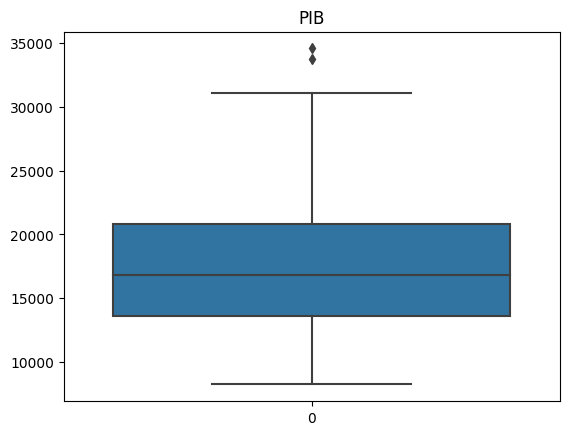

In [43]:
srn.boxplot(dataset.PIB).set_title('PIB')

[Text(0.5, 1.0, 'PIB')]

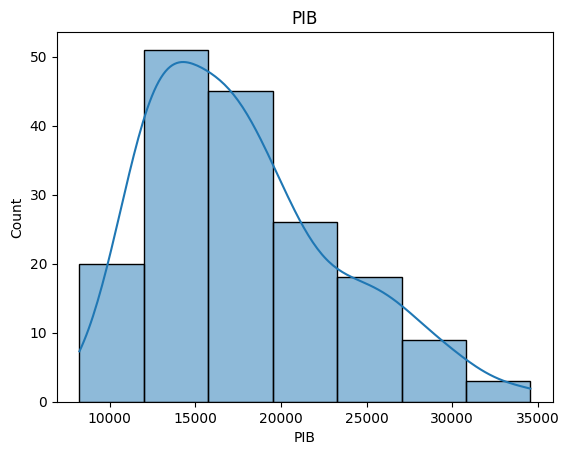

In [48]:
srn.histplot(dataset.PIB, kde = True, bins = 7).set(title = 'PIB')

Text(0.5, 1.0, 'Valor Empenho')

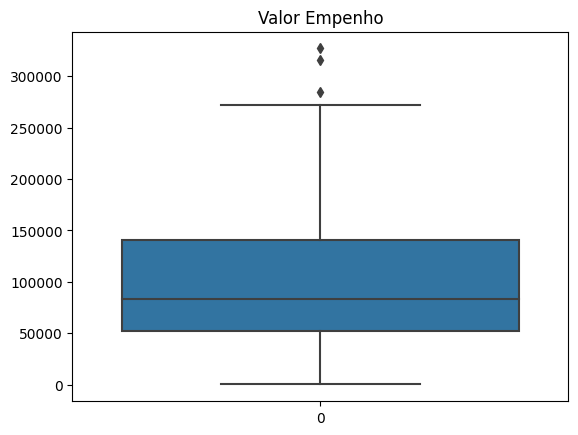

In [44]:
srn.boxplot(dataset.VALOREMPENHO).set_title('Valor Empenho')

[Text(0.5, 1.0, 'Valor Empenho')]

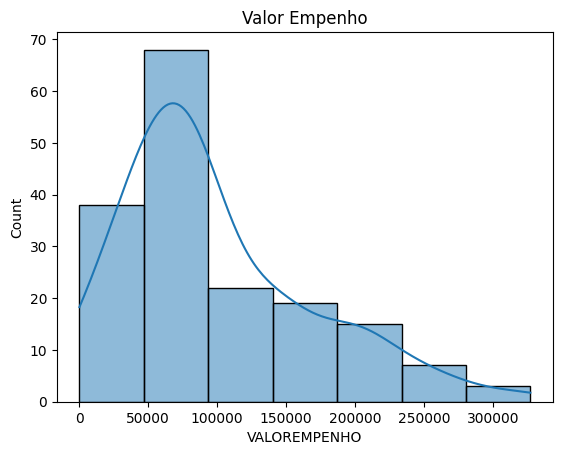

In [49]:
srn.histplot(dataset.VALOREMPENHO, kde = True, bins = 7).set(title = 'Valor Empenho')